In [ ]:
from Architectures.AE import AE1
from Filters.filters import edge_detect
from matplotlib import pyplot as plt
import numpy as np

In [24]:
all_images = []
for group in ["CN","MCI","AD"]:
    with open(f"Data/{group}.npy","br") as f:
        images = np.load(f)
    i_start = len(all_images)
    all_images.extend(images)
    print(group, i_start,":",len(all_images))
all_images = np.stack(all_images)
print(all_images.shape)

CN 0 : 1326
MCI 1326 : 1787
AD 1787 : 2000
(2000, 80, 96, 80)


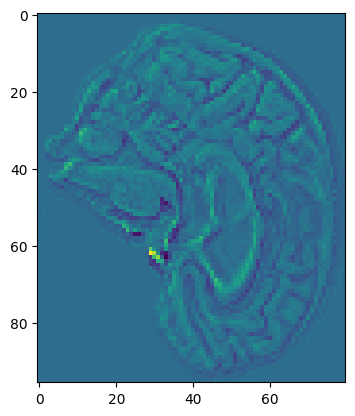

In [17]:
CN_sharpened = edge_detect(edge_detect(all_images[:300], 3, alpha=0.4), 1)
plt.imshow(CN_sharpened[0][40])

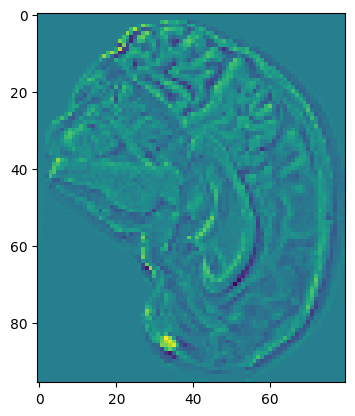

In [25]:
AD_sharpened = edge_detect(edge_detect(all_images[1787:1987], 3, alpha=0.4), 1)
plt.imshow(AD_sharpened[0][40])

In [18]:
ae = AE1(CN_sharpened.shape, latent_dim = 24)
ae.train(CN_sharpened, epochs = 8)

Interpreted image shape: (80, 96, 80, 1)
Pre-flattened latent shape: (None, 10, 12, 10, 32)


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 80, 96, 80, 1)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 24)             │       939,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 80, 96, 80, 1)  │     1,005,201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,944,377 (7.42 MB)

 Trainable params: 1,944,377 (7.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 604ms/step - loss: 0.0304 - val_loss: 0.0279
Epoch 2/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 529ms/step - loss: 0.0277 - val_loss: 0.0270
Epoch 3/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 510ms/step - loss: 0.0272 - val_loss: 0.0264
Epoch 4/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 495ms/step - loss: 0.0257 - val_loss: 0.0260
Epoch 5/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 497ms/step - loss: 0.0254 - val_loss: 0.0258
Epoch 6/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 495ms/step - loss: 0.0251 - val_loss: 0.0256
Epoch 7/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 495ms/step - loss: 0.0259 - val_loss: 0.0255
Epoch 8/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 488ms/step - loss: 0.0250 - val_loss: 0.0254


In [19]:
ae.train(CN_sharpened, epochs = 8)

Epoch 1/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 495ms/step - loss: 0.0246 - val_loss: 0.0254
Epoch 2/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 498ms/step - loss: 0.0261 - val_loss: 0.0253
Epoch 3/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 499ms/step - loss: 0.0251 - val_loss: 0.0252
Epoch 4/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 501ms/step - loss: 0.0247 - val_loss: 0.0251
Epoch 5/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 503ms/step - loss: 0.0248 - val_loss: 0.0252
Epoch 6/8
 3/15 ━━━━━━━━━━━━━━━━━━━━ 5s 442ms/step - loss: 0.0250

KeyboardInterrupt: 

In [20]:
i = 0
ae.save(f"Trained Models/AE_sharp/24.{i}")

Models saved to Trained Models/AE_sharp/24.0


In [21]:
latent = ae.encode(CN_sharpened)
recon = ae.decode(latent)

from Metrics.metrics import NMSE, SSIM
ssim = SSIM(recon.reshape(CN_sharpened.shape), CN_sharpened)
print("ssim", ssim)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 303ms/step
ssim 0.6585384244206953


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


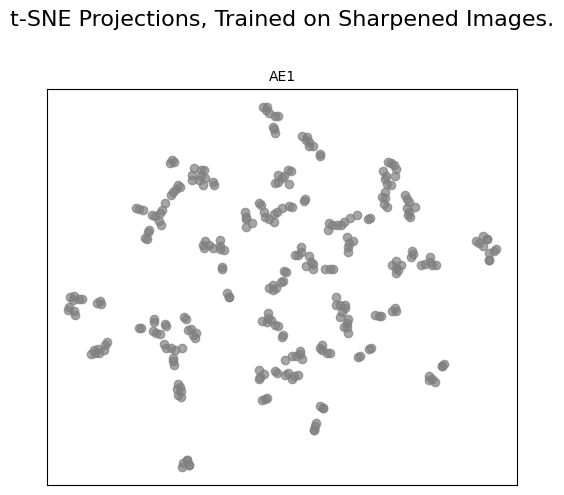

In [22]:
from sklearn.manifold import TSNE

# Function to plot t-SNE projection
def pTSNE(model, images, ax, color=None, label=None, perplexity=5, title="t-SNE Projection"):
    z_mean = model.encoder.predict(images)
    if isinstance(z_mean, list):
        z_mean = z_mean[0]
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    r = tsne.fit_transform(z_mean)
    
    ax.scatter(r[:, 0], r[:, 1], color="gray", label="ALL", alpha=0.7)
    # markers = ".^p"
    ax.set_title(title, fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(True, alpha=0.5)
    # ax.set_frame_on(False)
    # ax.legend(fontsize=8)

# Assuming `models` is a dictionary of 16 models
fig, axes = plt.subplots(1,1, figsize=(5, 5))
fig.suptitle("t-SNE Projections, Trained on Sharpened Images.", fontsize=16)
models = {"AE1": ae}
for ax, (model_name, model) in zip([axes], models.items()):
    pTSNE(model, CN_sharpened, ax, title=model_name)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


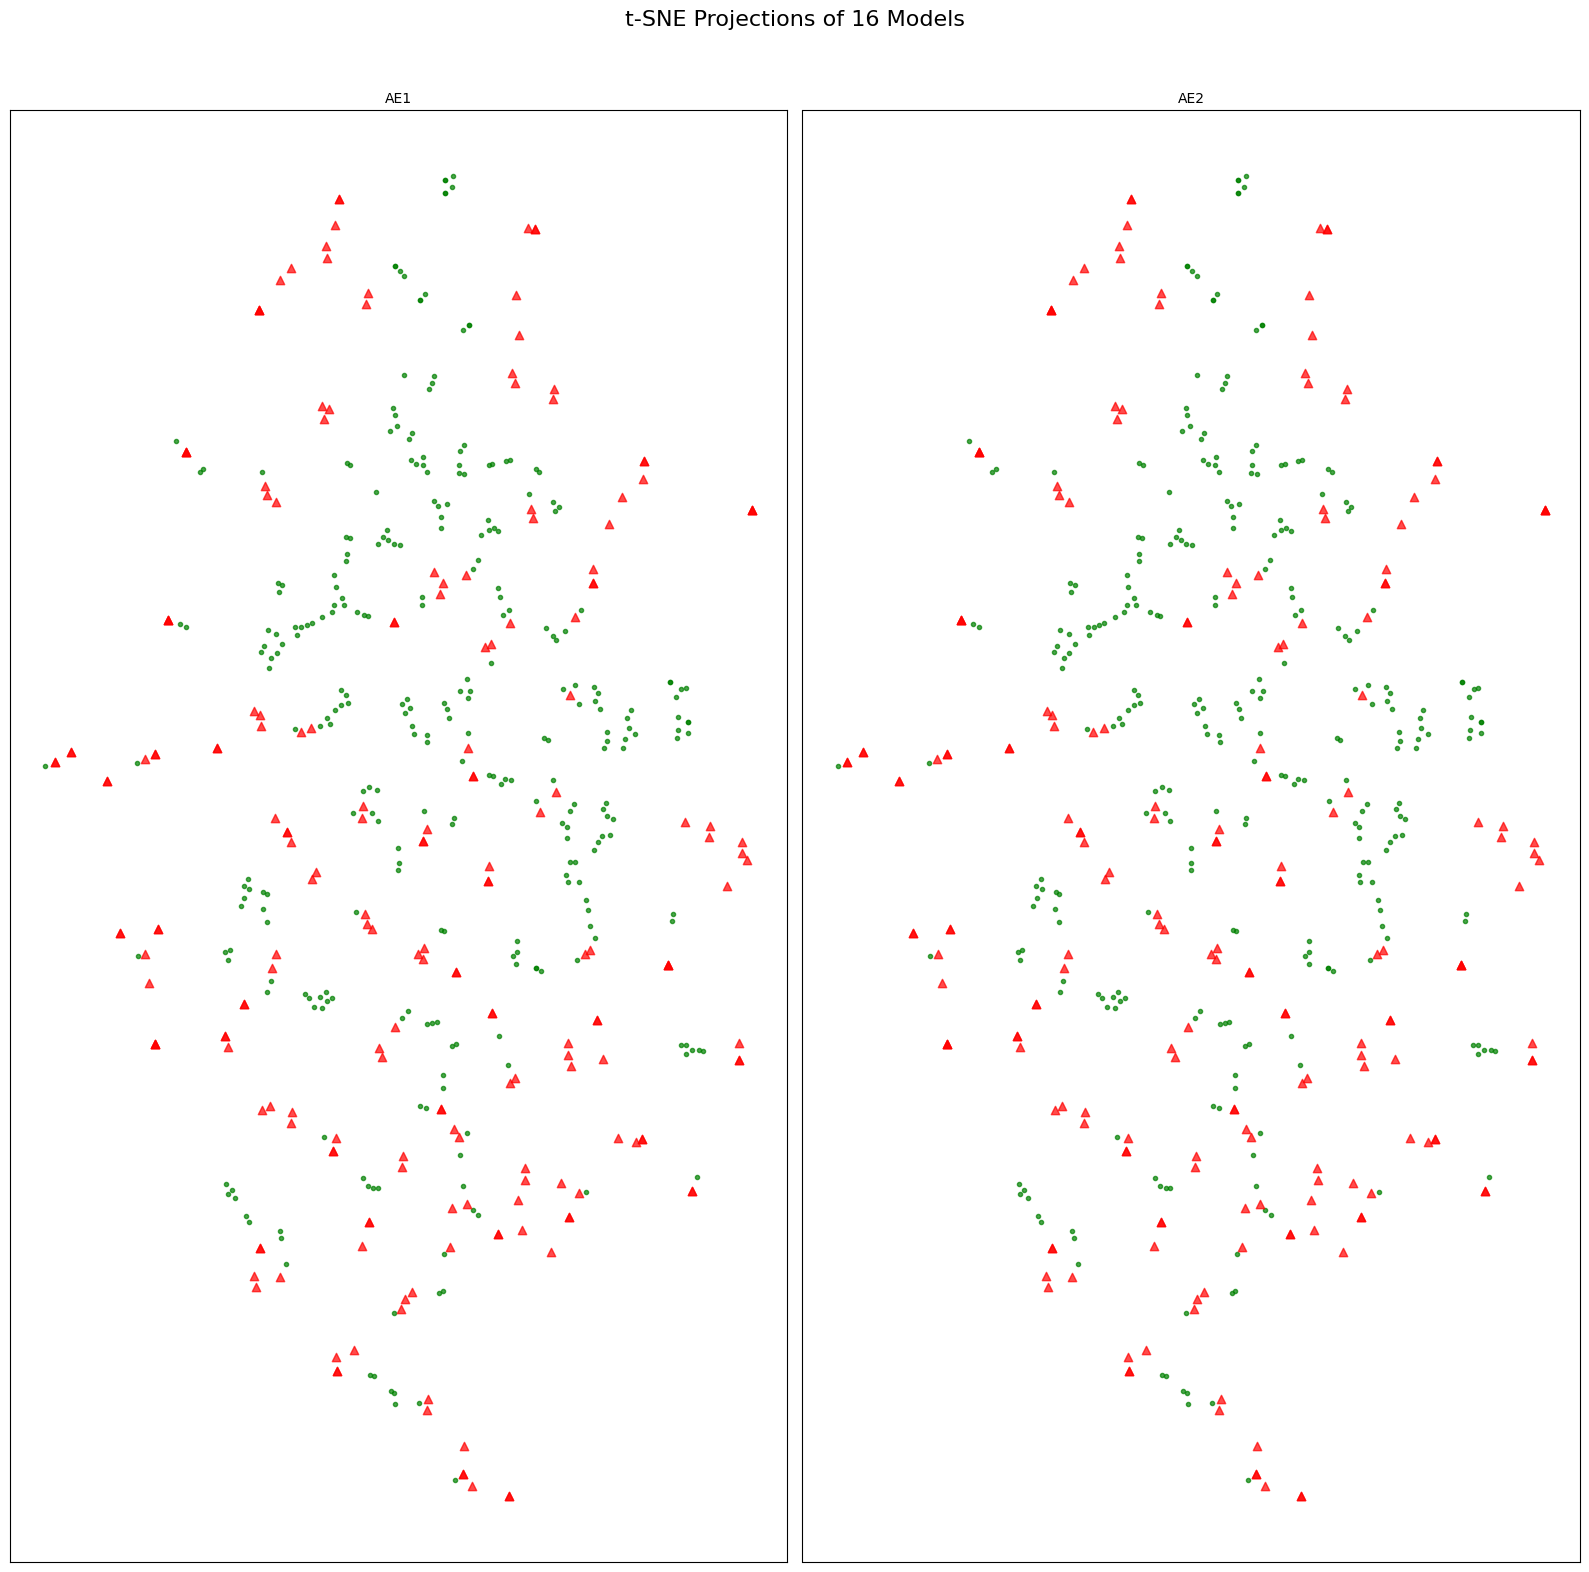

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Function to plot t-SNE projection
def pTSNE(model, datasets, colors, labels, ax, perplexity=5, title="t-SNE Projection"):
    """
    Plots the t-SNE projection of the encoded representation of the dataset.

    Parameters:
    - model: The model used for encoding the dataset.
    - datasets: List of datasets to be encoded and projected.
    - colors: List of colors for different datasets.
    - labels: List of labels for the legend.
    - ax: The subplot axis for plotting.
    - perplexity: The perplexity parameter for t-SNE (default is 5).
    - title: The title for the plot.
    """
    combined_data = np.concatenate(datasets, axis=0)
    z_mean = model.encoder.predict(combined_data)
    if isinstance(z_mean, list):
        z_mean = z_mean[0]
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    r = tsne.fit_transform(z_mean)
    
    start_idx = 0
    markers = ".^p"
    i=0
    for dataset, color, label in zip(datasets, colors, labels):
        if color is None: continue
        end_idx = start_idx + len(dataset)
        ax.scatter(r[start_idx:end_idx, 0], r[start_idx:end_idx, 1], 
                   color=color, label=label, alpha=0.7, marker=markers[i])
        i+=1
        start_idx = end_idx

    ax.set_title(title, fontsize=10)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(True, alpha=0.5)
    # ax.set_frame_on(False)
    # ax.legend(fontsize=8)

# Assuming `models` is a dictionary of 16 models
fig, axes = plt.subplots(1, 2, figsize=(16, 16))
fig.suptitle("t-SNE Projections of 16 Models", fontsize=16)
datasets = [CN_sharpened, AD_sharpened, AD_sharpened]
colors=["g",None,"r"]
models = {"AE1": ae, "AE2":ae}
labels=["CN","MCI","AD"]
for ax, (model_name, model) in zip(axes.flat, models.items()):
    pTSNE(model, datasets, colors, labels, ax, title=model_name)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
